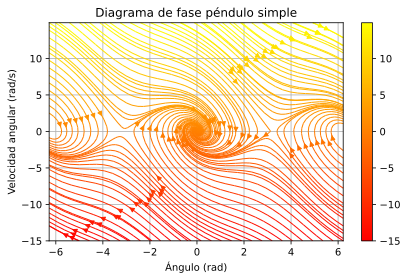

In [43]:
from pylab import *

%config InlineBackend.figure_format = 'svg' # figuras alta calidad jupyter

g , L, b = 9.81, 1, 2
xvalues, yvalues = meshgrid(arange(-2*np.pi, 2*np.pi, 0.1), arange(-15, 15, 0.1))
xdot = yvalues
ydot = -g/L*sin(xvalues)-b*yvalues

fig, axs = plt.subplots(figsize=(6, 4), tight_layout=True)
strm = streamplot(xvalues, yvalues, xdot, ydot,broken_streamlines=False,color=xdot, linewidth=1, cmap='autumn')
plt.xlabel('Ángulo (rad)')
plt.ylabel('Velocidad angular (rad/s)')
plt.title('Diagrama de fase péndulo simple')
plt.grid(True)
fig.colorbar(strm.lines)
show()

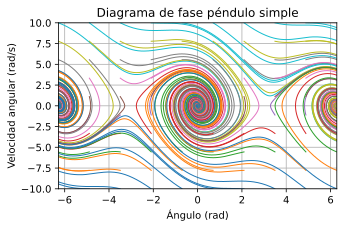

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
 
# Parameters
g = 9.81       # Aceleración de gravedad (m/s^2)
L = 1.0        # Longitud del péndulo (m)
b = 1          # Coficiente de disipación
 
# Define the ODEs
def pendulum_ode(t, state):
    theta, omega = state
    dtheta_dt = omega
    domega_dt = - (g/L) * np.sin(theta) - b * omega
    return [dtheta_dt, domega_dt]
 
# Create a grid of initial conditions in the phase space
theta_range = np.linspace(-2*np.pi, 2*np.pi, 10)
omega_range = np.linspace(-10, 10, 10)
 
# Initialize lists to store trajectories
trajectories = []
 
# Integrate the ODEs for a subset of initial conditions
for theta_0 in theta_range:
    for omega_0 in omega_range:
        initial_state = [theta_0, omega_0]
        t_span = (0, 10)  # Time span for integration
        sol = solve_ivp(pendulum_ode, t_span, initial_state, t_eval=np.linspace(*t_span, 1000))
        trajectories.append(sol.y)
 
# Plot the phase portrait 
plt.figure(figsize=(5, 3))
for traj in trajectories:
    plt.plot(traj[0], traj[1], linewidth=1)
plt.xlim(-2*np.pi, 2*np.pi)  # Restrict x-axis limits
plt.ylim(-10, 10)  # Restrict y-axis limits
plt.xlabel('Ángulo (rad)')
plt.ylabel('Velocidad angular (rad/s)')
plt.title('Diagrama de fase péndulo simple')
plt.grid(True)
plt.show()